# IMPORTING REQUIRED LIBRARIES

In [197]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# LOADING DATASET

In [198]:
df=pd.read_csv("/content/Crude Oil Prices Daily.csv")

In [199]:
df

,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87
...,...,...
8218,7/3/2018,74.19
8219,7/4/2018,NaN
8220,7/5/2018,73.05
8221,7/6/2018,73.78


In [200]:
df.head()


,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87


In [201]:
df.shape

(8223, 2)

In [202]:
df.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8223 non-null   object 
 1   Closing Value  8216 non-null   float64
dtypes: float64(1), object(1)
memory usage: 128.6+ KB


In [204]:
df.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [205]:
df.dropna(axis=0,inplace=True)

# CHECKING FOR NULL VALUES

In [206]:
df.isnull().sum()

Date             0
Closing Value    0
dtype: int64

# CHECKING FOR DUPLICATED ROWS

In [207]:
df.duplicated().sum()

0

In [208]:
df[df.duplicated()]

,Date,Closing Value


# REMOVING DUPLICATED ROWS

In [209]:
df=df.drop_duplicates()

In [210]:
df.shape

(8216, 2)

In [211]:
df.isna().sum()

Date             0
Closing Value    0
dtype: int64

In [212]:
data_oil=df.reset_index()['Closing Value']
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

# ROWS CONTAINING NULL VALUES

In [213]:
df[df['Closing Value'].isna()]

,Date,Closing Value


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


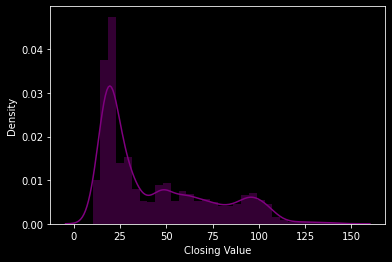

In [214]:
sns.distplot(df['Closing Value'], kde = True, color ='purple')
plt.show()

In [215]:
df["Closing Value"].median()

29.61

# REPLACING NULL VALUES WITH THE MEDIAN

In [216]:
df['Closing Value']=df["Closing Value"].fillna(df['Closing Value'].median())

In [217]:
df.isnull().sum()

Date             0
Closing Value    0
dtype: int64

# UNIVARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


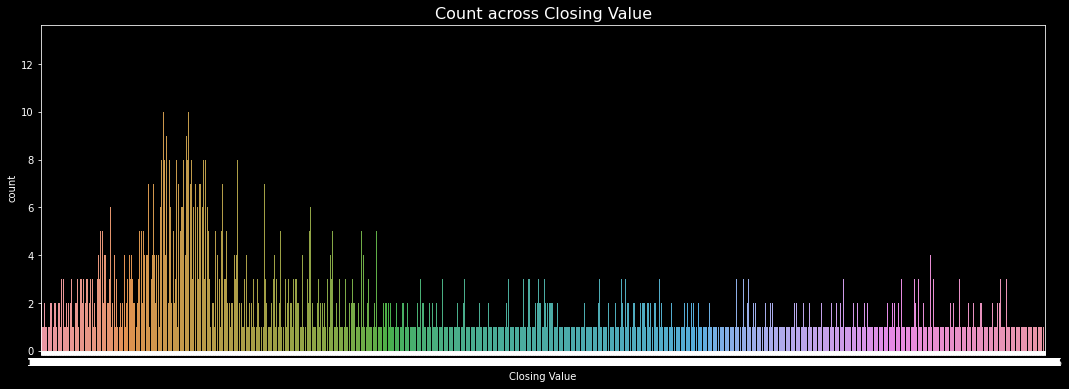

In [218]:
plt.figure(figsize = (18,6))
sns.countplot(df['Closing Value'])
plt.title('Count across Closing Value',fontsize=16)
plt.show()

# MULTIVARIATE ANALYSIS

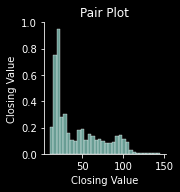

In [219]:
plt.style.use("dark_background")
sns.pairplot(df)
plt.title('Pair Plot')
plt.show()

# DATA VISUALIZATION

In [220]:
numerical_data=df[['Date','Closing Value']]

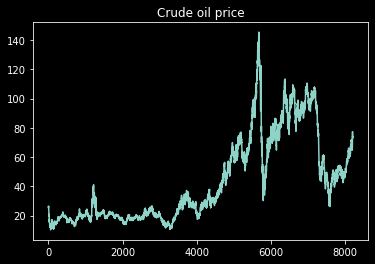

In [221]:
plt.title('Crude oil price')
plt.plot(data_oil)

# PLOTTING A HEATMAP

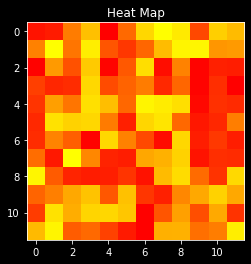

In [222]:
data = np.random.random(( 12 , 12 ))
plt.imshow( data , cmap = 'autumn' , interpolation = 'nearest' )
  
plt.title( "Heat Map" )
plt.show()

In [223]:
type(df)

pandas.core.frame.DataFrame

# FEATURE SCALING

In [224]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

# SPLITTING INTO TEST AND TRAIN DATA

In [225]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [226]:
training_size,test_size

(5340, 2876)

In [227]:
train_data.shape

(5340, 1)

#  CREATING DATASET WITH SLIDING WINDOWS

In [228]:
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []

    for i in range(len(dataset)-time_step-1):

        a = dataset[i:(i+time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])

    return np.array(dataX),np.array(dataY)

In [229]:
time_step = 10

X_train, Y_train=create_dataset(train_data,time_step)

X_test, Y_test = create_dataset(test_data,time_step)


In [230]:
print(X_train.shape),print(Y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [231]:
print(X_test.shape),print(Y_test.shape)

(2865, 10)
(2865,)


(None, None)

In [232]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [233]:
X_train.shape

(5329, 10)

In [234]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [235]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# SEQUENTIAL MODEL

In [236]:
model=Sequential()

# LSTM MODEL

In [237]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

# DENSE MODEL

In [238]:
model.add(Dense(1))

In [239]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_10 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [240]:
model.compile(loss='mean_squared_error',optimizer='adam')

# EPOCHS

In [241]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=64,verbose=1)

Epoch 1/5
84/84 [==============================] - 10s 43ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 2/5
84/84 [==============================] - 2s 27ms/step - loss: 1.2989e-04 - val_loss: 7.5860e-04
Epoch 3/5
84/84 [==============================] - 2s 27ms/step - loss: 1.2429e-04 - val_loss: 7.8275e-04
Epoch 4/5
84/84 [==============================] - 2s 27ms/step - loss: 1.2124e-04 - val_loss: 8.5721e-04
Epoch 5/5
84/84 [==============================] - 2s 26ms/step - loss: 1.2216e-04 - val_loss: 8.8231e-04


# TRANSFORM BACK TO ORIGINAL FORM

In [242]:
train_predict=scaler.inverse_transform(train_data) 
test_predict=scaler.inverse_transform(test_data)

# CALCULATE RMSE PERFORMANCE METRICS

In [243]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

29.347830443269938

In [244]:
from tensorflow.keras.models import load_model

In [245]:
model.save("crude_oil.h5")

In [246]:
!tar -zcvf crudeoils.tgz crude_oil.h5

crude_oil.h5


# PLOTTING

In [247]:
look_back=10
trainpredictPlot = np.empty_like(data_oil)
trainpredictPlot[:, :]= np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# SHIFT TEST PREDICTIONS FOR PLOTTING

In [248]:
testPredictplot = np.empty_like(data_oil)
testPredictplot[:,: ] = np.nan
testPredictplot[look_back:len(test_predict)+look_back, :] = test_predict

# PLOT BASELINE AND PREDICTIONS

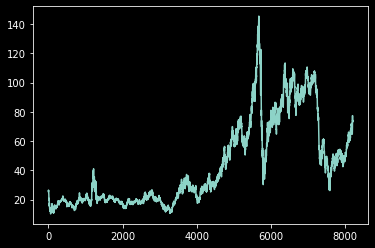

In [249]:
plt.plot(scaler.inverse_transform(data_oil))
plt.show()

In [250]:
len(test_data)

2876

In [251]:
X_input=test_data[2866:].reshape(1,-1)
X_input.shape

(1, 10)

In [252]:
(1, 10)
temp_input=list(X_input) 
temp_input=temp_input[0].tolist()

In [253]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [254]:
lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
       X_input=np.array(temp_input[1:]) 
       print("{} day input {}".format(i,X_input))
       X_input=X_input.reshape(1,-1)
       X_input = X_input.reshape((1, n_steps, 1)) 
       yhat = model.predict(X_input, verbose=0)
       print("{} day output {}".format(i,yhat))
       temp_input.extend(yhat[0].tolist())
       temp_input=temp_input[1:] 
       lst_output.extend(yhat.tolist())
       i=i+1
    else:
       X_input = X_input.reshape((1, n_steps,1))
       yhat = model.predict(X_input, verbose=0)
       print(yhat[0])
       temp_input.extend(yhat[0].tolist()) 
       print(len(temp_input))
       lst_output.extend(yhat.tolist())
       i=i+1

[0.4698805]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.46988049]
1 day output [[0.47300652]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.46988049 0.47300652]
2 day output [[0.47155723]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.46988049 0.47300652 0.47155723]
3 day output [[0.46847057]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.46988049 0.47300652 0.47155723 0.46847057]
4 day output [[0.4687747]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.46988049
 0.47300652 0.47155723 0.46847057 0.46877471]
5 day output [[0.46846893]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.46988049 0.47300652
 0.47155723 0.46847057 0.46877471 0.46846893]
6 day output [[0.4683229]]
7 day input [0.46497853 0.47038353 0.47149415 0.46988049 0.47300652 0

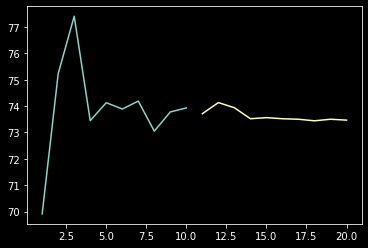

In [255]:
day_new=np.arange(1,11) 
day_pred=np.arange(11,21)
len(data_oil)
plt.plot(day_new, scaler.inverse_transform(data_oil[8206:])) 
plt.plot(day_pred, scaler.inverse_transform(lst_output))

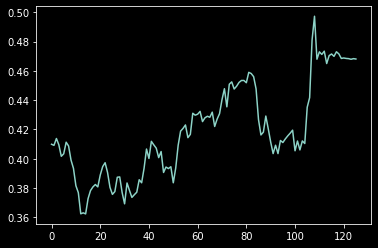

In [256]:
df3=data_oil.tolist() 
df3.extend(lst_output) 
plt.plot(df3[8100:])

In [257]:
df3=scaler.inverse_transform(df3).tolist()

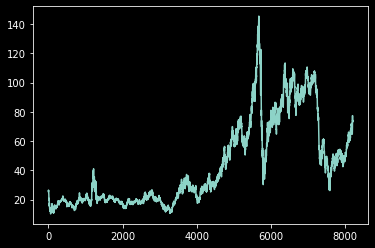

In [258]:
plt.plot(scaler.inverse_transform(data_oil))

# IBM DEPLOYMENT 




In [259]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [260]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [261]:
from ibm_watson_machine_learning import APIClient
wml_credentials ={
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"Gvrks_raf7LwmF9CeOi6B-BxvXn07DU-TfX8EaYerHoA"
}
client = APIClient(wml_credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [262]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/92bfabbf22c74d0e8389d5555a1daccd:52fa3ce6-0f8d-4130-b058-fe22ea8cc573::',
      'guid': '52fa3ce6-0f8d-4130-b058-fe22ea8cc573',
      'name': 'Watson Machine Learning-h0',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'B2_deploy',
    'scope': {'bss_account_id': '92bfabbf22c74d0e8389d5555a1daccd'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'c6c144cb-1fa8-441e-ac7d-1decf9e6b4d8',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': '9ee9e8f2de55464b8efde94f3adc5c0c',
        'api_key': '0uJreOznPRv_CcaVQvo2o8xtYMTR25TEbM8FL3kr23kn',
        'secret_access_key': 'b4142f4f5857c06a6ee566a1845efa2bcc6d3b86714a035b',
        'service_id': 'ServiceId-f995c20e-bd02-4ba2-96cf-3450e3b93c91'},
       'editor': {'access_key_id': '213b7a5c1df5434a88f121182bafaed9',
        'api_key

In [263]:
def guid_space_name(client,B2_deploy):
  space = client.spaces.get_details()
  return(next(item for item in space['resources'] if item['entity']['name']==B2_deploy)['metadata']['id'])

In [264]:
space_uid = guid_space_name(client,'B2_deploy')
space_uid

'84f7e08c-555a-480b-aaa5-fa6be840c4fe'

In [265]:
client.set.default_space(space_uid)

'SUCCESS'

In [266]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [267]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [268]:
model_details = client.repository.store_model(model='crudeoils.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN B2 Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [269]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-10T11:32:11.050Z',
  'id': 'c97104e8-67ca-4f0b-8e6b-7c5428a1bf81',
  'modified_at': '2022-11-10T11:32:14.746Z',
  'name': 'CNN B2 Model',
  'owner': 'IBMid-662004072Q',
  'resource_key': 'cbd9e1c5-22e4-4ea3-a114-76e3ba5a7b83',
  'space_id': '84f7e08c-555a-480b-aaa5-fa6be840c4fe'},
 'system': {'warnings': []}}

In [270]:
model_id = client.repository.get_model_id(model_details)
model_id

'c97104e8-67ca-4f0b-8e6b-7c5428a1bf81'